In [40]:
import numpy as np
import pickle
import cv2
from os import listdir
from sklearn.preprocessing import LabelBinarizer
from keras.models import Sequential
# from keras.layers.normalization import BatchNormalization
from tensorflow.keras.layers import BatchNormalization
from keras.layers import Conv2D, MaxPool2D
# from keras.layers.convolutional import MaxPooling2D
# from keras.layers.core import Activation, Flatten, Dropout, Dense
from keras.layers import Dense, Activation, Dropout, Reshape, Permute, Flatten
from keras import backend as K
# from keras.preprocessing.image import ImageDataGenerator
# from keras.optimizers import Adam
from tensorflow.keras.optimizers import Adam
#from keras.preprocessing import image
from tensorflow.keras.utils import img_to_array
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import tensorflow as tf
import keras
from keras.optimizers import RMSprop
from tensorflow.keras.optimizers import RMSprop

In [41]:
EPOCHS = 30
INIT_LR = 1e-3
BS = 32
default_image_size = tuple((256, 256))
image_size = 0
directory_root = 'dataset/'
width=256
height=256
depth=3

In [42]:
def convert_image_to_array(image_dir):
    try:
        image = cv2.imread(image_dir)
        if image is not None :
            image = cv2.resize(image, default_image_size) 
            image = cv2.resize(image, (50,50))
            return img_to_array(image)
        else :
            return np.array([])
    except Exception as e:
        print(f"Error : {e}")
        return None

In [43]:
image_list, label_list = [], []
try:
    print("[INFO] Loading images ...")
    root_dir = listdir(directory_root)
    for directory in root_dir :
        # remove .DS_Store from list
        if directory == ".DS_Store" :
            root_dir.remove(directory)

    for plant_folder in root_dir :
        plant_disease_folder_list = listdir(f"{directory_root}/{plant_folder}")
        
        for disease_folder in plant_disease_folder_list :
            # remove .DS_Store from list
            if disease_folder == ".DS_Store" :
                plant_disease_folder_list.remove(disease_folder)

        for plant_disease_folder in plant_disease_folder_list:
            print(f"[INFO] Processing {plant_disease_folder} ...")
            plant_disease_image_list = listdir(f"{directory_root}/{plant_folder}/{plant_disease_folder}/")
                
            for single_plant_disease_image in plant_disease_image_list :
                if single_plant_disease_image == ".DS_Store" :
                    plant_disease_image_list.remove(single_plant_disease_image)

            for image in plant_disease_image_list[:2000]:
                image_directory = f"{directory_root}/{plant_folder}/{plant_disease_folder}/{image}"
                if image_directory.endswith(".PNG") == True or image_directory.endswith(".PNG") == True:
                    image_list.append(convert_image_to_array(image_directory))
                    label_list.append(plant_disease_folder)
    print("[INFO] Image loading completed")  
except Exception as e:
    print(f"Error : {e}")

[INFO] Loading images ...
[INFO] Processing vit A ...
[INFO] Processing vit B ...
[INFO] Processing vit C ...
[INFO] Processing vit D ...
[INFO] Processing vit E ...
[INFO] Image loading completed


In [44]:
image_size = len(image_list)

label_binarizer = LabelBinarizer()
image_labels = label_binarizer.fit_transform(label_list)
pickle.dump(label_binarizer,open('label_transform.pkl', 'wb'))
n_classes = len(label_binarizer.classes_)

print(label_binarizer.classes_)
np_image_list = np.array(image_list, dtype=np.float16) / 255.0

print("[INFO] Spliting data to train, test")
x_train, x_test, y_train, y_test = train_test_split(np_image_list, image_labels, test_size=0.2, random_state = 42) 
print(image_labels)

['vit A' 'vit B' 'vit C' 'vit D' 'vit E']
[INFO] Spliting data to train, test
[[1 0 0 0 0]
 [1 0 0 0 0]
 [1 0 0 0 0]
 ...
 [0 0 0 0 1]
 [0 0 0 0 1]
 [0 0 0 0 1]]


1084 train samples
271 test samples
Label: [[0 0 0 0 1]]


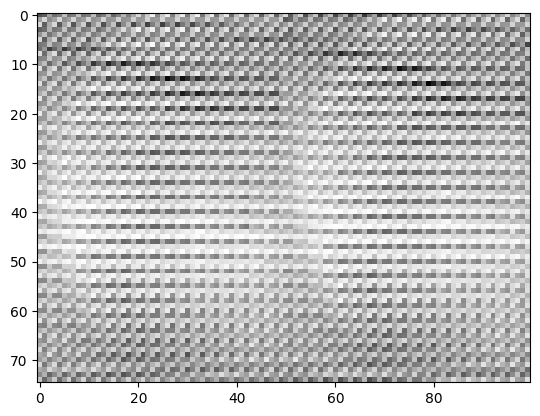

In [45]:
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')


x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

#x_train /= 255
#x_test /= 255

#y_train = keras.utils.to_categorical(y_train, n_classes)
#y_test = keras.utils.to_categorical(y_test, n_classes)

print("Label:",y_train[255:256])
plt.imshow(x_train[255:256].reshape(75,100), cmap='gray')
plt.show()

In [46]:
first_layer_size = 32
model = Sequential()
inputShape = (50, 50, depth)
chanDim = -1
if K.image_data_format() == "channels_first":
    inputShape = (depth, height, width)
    chanDim = 1
# model.add(Conv2D(32, (3, 3), padding="same",input_shape=inputShape))
# model.add(Activation("relu"))
# model.add(BatchNormalization(axis=chanDim))
# model.add(MaxPooling2D(pool_size=(3, 3)))
# model.add(Dropout(0.25))
# model.add(Conv2D(64, (3, 3), padding="same"))
# model.add(Activation("relu"))
# model.add(BatchNormalization(axis=chanDim))
# model.add(Conv2D(64, (3, 3), padding="same"))
# model.add(Activation("relu"))
# model.add(BatchNormalization(axis=chanDim))
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.25))
# model.add(Conv2D(128, (3, 3), padding="same"))
# model.add(Activation("relu"))
# model.add(BatchNormalization(axis=chanDim))
# model.add(Conv2D(128, (3, 3), padding="same"))
# model.add(Activation("relu"))
# model.add(BatchNormalization(axis=chanDim))
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.25))
# model.add(Flatten())
# model.add(Dense(1024))
# model.add(Activation("relu"))
# model.add(BatchNormalization())
# model.add(Dropout(0.5))
# model.add(Dense(n_classes))
# model.add(Activation("softmax"))

model.add(Conv2D(32, kernel_size=(5, 5), strides=(1, 1),
                 activation='relu',
                 input_shape=inputShape))
model.add(MaxPool2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Conv2D(64, (5, 5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(1000, activation='relu'))
model.add(Dense(n_classes, activation='softmax'))

model.summary()

c:\Users\dhira\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_1 (Conv2D)               │ (None, 46, 46, 32)     │         2,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 23, 23, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 19, 19, 64)     │        51,264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 9, 9, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 5184)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1000)           │     5,185,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 5)              │         5,005 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,243,701 (20.00 MB)

 Trainable params: 5,243,701 (20.00 MB)

 Non-trainable params: 0 (0.00 B)

In [48]:
opt = Adam(learning_rate=INIT_LR, decay=INIT_LR / EPOCHS)
# distribution
model.compile(loss="categorical_crossentropy", optimizer=RMSprop(),metrics=["accuracy"])
# train the network
print("[INFO] training network...")



#history = model.fit_generator(
#    aug.flow(x_train, y_train, batch_size=BS),
#    validation_data=(x_test, y_test),
#    steps_per_epoch=len(x_train) // BS,
#    epochs=EPOCHS, verbose=1
#    )
history = model.fit(x_train,y_train,validation_split=0.25,
                    batch_size=BS,
                    epochs=EPOCHS,validation_data=(x_test, y_test),
                    verbose=1)

c:\Users\dhira\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\optimizers\base_optimizer.py:86: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(


[INFO] training network...
Epoch 1/30
34/34 ━━━━━━━━━━━━━━━━━━━━ 5s 96ms/step - accuracy: 0.2471 - loss: 2.0861 - val_accuracy: 0.4760 - val_loss: 1.4061
Epoch 2/30
34/34 ━━━━━━━━━━━━━━━━━━━━ 5s 89ms/step - accuracy: 0.4160 - loss: 1.4271 - val_accuracy: 0.4317 - val_loss: 1.2576
Epoch 3/30
34/34 ━━━━━━━━━━━━━━━━━━━━ 3s 78ms/step - accuracy: 0.4334 - loss: 1.2744 - val_accuracy: 0.5609 - val_loss: 1.0614
Epoch 4/30
34/34 ━━━━━━━━━━━━━━━━━━━━ 5s 79ms/step - accuracy: 0.5648 - loss: 1.2237 - val_accuracy: 0.5756 - val_loss: 1.0394
Epoch 5/30
34/34 ━━━━━━━━━━━━━━━━━━━━ 3s 77ms/step - accuracy: 0.5956 - loss: 0.9722 - val_accuracy: 0.1734 - val_loss: 2.7988
Epoch 6/30
34/34 ━━━━━━━━━━━━━━━━━━━━ 3s 79ms/step - accuracy: 0.5471 - loss: 1.1778 - val_accuracy: 0.4686 - val_loss: 2.0221
Epoch 7/30
34/34 ━━━━━━━━━━━━━━━━━━━━ 3s 82ms/step - accuracy: 0.5498 - loss: 1.1612 - val_accuracy: 0.6753 - val_loss: 0.8412
Epoch 8/30
34/34 ━━━━━━━━━━━━━━━━━━━━ 3s 86ms/step - accuracy: 0.6937 - loss: 0.8285

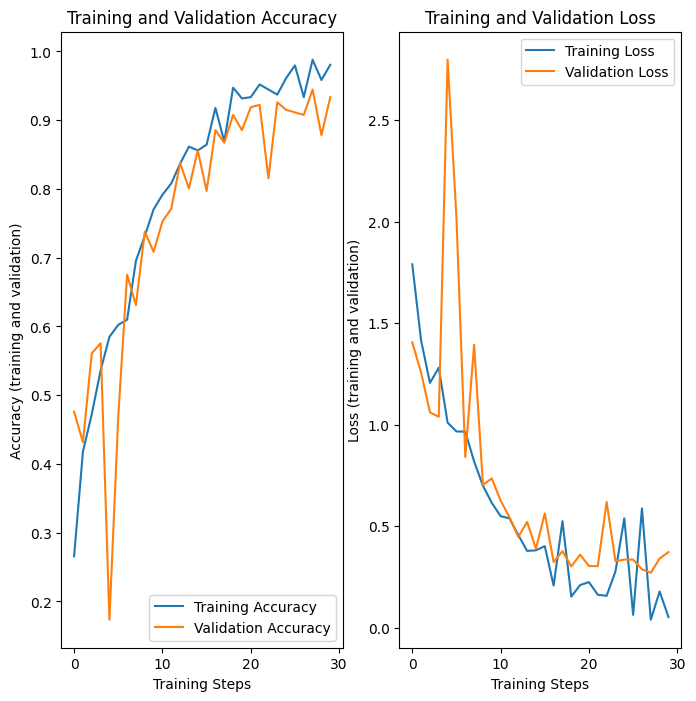

In [49]:
import matplotlib.pylab as plt
import numpy as np

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(EPOCHS)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.ylabel("Accuracy (training and validation)")
plt.xlabel("Training Steps")

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.ylabel("Loss (training and validation)")
plt.xlabel("Training Steps")
plt.savefig('graph_accuracy_graph.png',dpi=400)
plt.show()

In [50]:
history_dict = history.history
print(history_dict.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


In [51]:
print("[INFO] Calculating model accuracy")
scores = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {scores[1]*100}")

[INFO] Calculating model accuracy
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.9111 - loss: 0.5017
Test Accuracy: 93.35793256759644


In [52]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.3730534315109253
Test accuracy: 0.9335793256759644


In [53]:
prediction = model.predict(x_test[23:24])
prediction = prediction[0]
print('Prediction\n',prediction)
print('\nThresholded output\n',(prediction>0.5)*1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step
Prediction
 [7.4484817e-08 1.2040902e-02 2.8745459e-05 9.8788935e-01 4.0887855e-05]

Thresholded output
 [0 0 0 1 0]


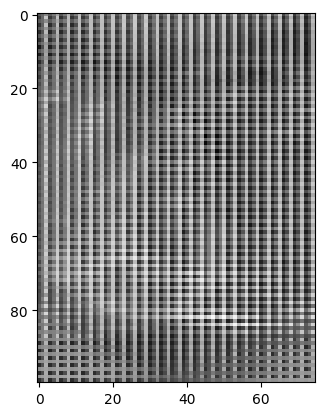

In [54]:
plt.imshow(x_test[23:24].reshape(100,75),cmap='gray')
plt.show()